In [1]:
from google.colab import drive
drive.mount('/content/drive/',  force_remount=True)
root_path = "/content/drive/My Drive/segmentation/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


Using TensorFlow backend.


(1000, 1000, 3)
(50, 50, 1, 256, 256, 3)
(50, 50, 1, 256, 256, 3)


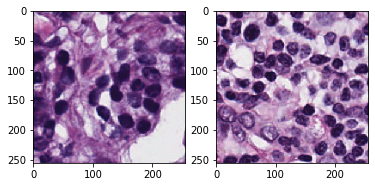

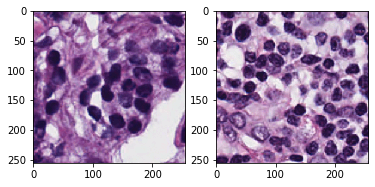

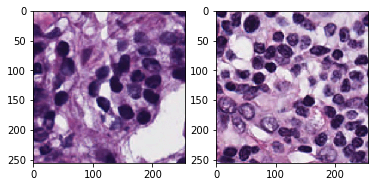

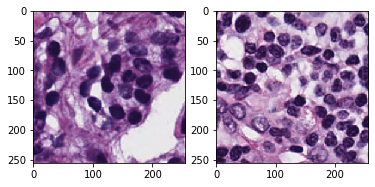

In [1]:
import sys
sys.path.append('drive/My Drive/segmentation_monuseg/patchify_py/')

from patchify import patchify, unpatchify

import numpy as np


import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread, imshow, concatenate_images
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
from PIL import Image



path = "C:\saadwaz\patchify_py\MonuSeg\Test\TissueImages/"

test_ti_ids = os.listdir(path)

im_width = 1000
im_height = 1000
def con_img_array(ids, base_path):
    X = np.zeros((len(ids), im_height, im_width, 3), dtype=np.float32)
    for i in (range(len(ids))):
        #print(ids[i])
        img = load_img( base_path + ids[i] , color_mode = "rgb")
        x_img = img_to_array(img)
        #x_img = resize(x_img, (1000, 1000, 1), mode = 'constant', preserve_range = True)
        X[i] = x_img/255.0
        
    #print("=========================================")
    return X


X = con_img_array(test_ti_ids, path)

print(X[1].shape)
image = np.array(X[1])


img_1 = X[0]
img_2 = X[1]


patches_1 = patchify(img_1, (256,256,3), step=15)
patches_2 = patchify(img_2, (256,256,3), step=15)

print("======================================================")
print(patches_1.shape)
print(patches_2.shape)

p1 = patches_1[ 0 , 0 , 0 , : , : , : ]
p2 = patches_2[ 0 , 0 , 0 , : , : , : ]

#f, axarr = plt.subplots(1,2)
#axarr[0].imshow(p1)
#axarr[1].imshow(p2)




#show all patches

def show_imgs(p1,p2):
  for i in range (0, 2 ):
    for j in range(0, 2):
      patch_1 = p1[ i , j , 0 , : , : , : ]
      patch_2 = p2[ i , j , 0 , : , : , : ]
      f, axarr = plt.subplots(1,2)
      axarr[0].imshow(patch_1)
      axarr[1].imshow(patch_2)

show_imgs(patches_1,patches_2)


In [1]:
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('drive/My Drive/segmentation_monuseg/patchify_py/')

from patchify import patchify, unpatchify

import numpy as np


import os
import random
import pandas as pd
import numpy as np
import skimage.io as io
from PIL import Image  
import PIL
import matplotlib.pyplot as plt
from tqdm import tqdm, trange
from skimage.io import imread, imshow, concatenate_images
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.transform import resize
from IPython.display import clear_output


import imageio.core.util

def ignore_warnings(*args, **kwargs):
    pass

imageio.core.util._precision_warn = ignore_warnings


batch_no = 0
img_no = 0
patch_x_no = 0
patch_y_no = 0

total_images = 0
total_patches = 0


def generate_patches(in_path,out_path,ext):

  global batch_no
  batch_no = batch_no + 1


  idx = os.listdir(in_path)

  im_width = 1000
  im_height = 1000
  def con_img_array(ids, base_path):
      X = np.zeros((len(ids), im_height, im_width, 3), dtype=np.float32)
      for i in (range(len(ids))):
          #print(ids[i])
          img = load_img( base_path + ids[i] , color_mode = "rgb")
          x_img = img_to_array(img)
          #x_img = resize(x_img, (1000, 1000, 1), mode = 'constant', preserve_range = True)
          X[i] = x_img/255.0
          
      #print("=========================================")
      return X


  X = con_img_array(idx, in_path)
  print(X.shape)


  def calc_patches_list(img_array, img_idx, out_path):
    
    #remove extension form idx
    new_idx = [x.replace(ext, '').replace("_bin_mask", '') for x in img_idx]

    global img_no
    img_no = 0

    total_images = img_array.shape[0]

    for n in range(img_array.shape[0]):
      
      
      img_no = img_no + 1

      img_1 = img_array[n]
      img_id = new_idx[n]

      patches_1 = patchify(img_1, (256,256,3), step=120)
      print(patches_1.shape)
      
      def show_imgs(p1):

        patch_x_no = 0
        patch_y_no = 0

        total_patches = p1.shape[0] * p1.shape[1]

        for i in range(p1.shape[0] ):

          patch_x_no = patch_x_no + 1

          for j in range(p1.shape[1]):

            patch_y_no = patch_y_no + 1

            patch_1 = p1[ i , j , 0 , : , : , : ]
            file_name = out_path + img_id + "_" + str(i) + str(j) + ".png"
            io.imsave(file_name,patch_1, check_contrast=False)

            clear_output(wait=True)
            print("Batch: ", batch_no)
            print("Image: ", img_no )
            print("Patch: ", patch_x_no, "-", patch_y_no )
            print("Total Images: ", total_images )
            print("Total Patches: ", total_patches )
            

      show_imgs(patches_1)

  calc_patches_list(X, idx, out_path)
  print("==== ALL DONE ====")


#call function here


in_path = "C:\saadwaz\patchify_py\MonuSeg/Test/TissueImages/"
out_path = "C:\MonuSeg_Short/Test/TissueImages/"
generate_patches(in_path,out_path,".png")

in_path = "C:\saadwaz\patchify_py\MonuSeg/Test/GroundTruth/"
out_path = "C:\MonuSeg_Short/Test/GroundTruth/"
generate_patches(in_path,out_path,".png")

in_path = "C:\saadwaz\patchify_py\MonuSeg/Training/TissueImages/"
out_path = "C:\MonuSeg_Short/Training/TissueImages/"
generate_patches(in_path,out_path,".png")

in_path = "C:\saadwaz\patchify_py\MonuSeg/Training/GroundTruth/"
out_path = "C:\MonuSeg_Short/Training/GroundTruth/"
generate_patches(in_path,out_path,".png")


Batch:  4
Image:  30
Patch:  7 - 49
Total Images:  30
Total Patches:  49
==== ALL DONE ====


In [9]:
!cd "drive/My Drive/new_short_monuseg/Test/TissueImages/" && ls -1 | wc -l

686


In [10]:
!cd "drive/My Drive/new_short_monuseg/Test/GroundTruth/" && ls -1 | wc -l

686


In [11]:
!cd "drive/My Drive/new_short_monuseg/Training/TissueImages/" && ls -1 | wc -l

1470


In [17]:
!cd "drive/My Drive/new_short_monuseg/Training/GroundTruth/" && ls -1 | wc -l

1470
